# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

__Цель исследования__

Построить модель, которая сможет предсказать коэффициент восстановления золота из золотосодержащей руды.

__Ход исследования__

Данные для исследования представлены данные с параметрами добычи и очистки.

Для построения модели необходимо:
* сделать обзор данных, проверить расчеты эффективности обогащегия руды, уточнить наличие признаков в выборках, подготовить данные к исследованию
* провести анализ (как меняется концентрация металов, как распределены размеры гранул сырья, суммарная концентрация веществ)
* подготовить и обучить модели, выбрав и представив лучшую.

_Перед началом работы загрузим необходимые библиотеки_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

RANDOM_STATE = 12345

## Подготовка данных

### Обзор данных

Для знакомства с данными откроем файлы и выведем:
    
1. Первые 10 строк каждой таблицы

2. Общую информацию по каждой таблице

3. Гистограммы для всех числовых столбцов каждой таблицы

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')    
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv', index_col='date')
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv', index_col='date')
    df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv', index_col='date') 

In [3]:
# Функция обзора данных датафрейма

def df_review(df):
    display(df.head(10))
    display(df.describe())
    display(df.info())
    df.hist(bins=50, figsize=(105,100));

#### Исходные данные

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

None

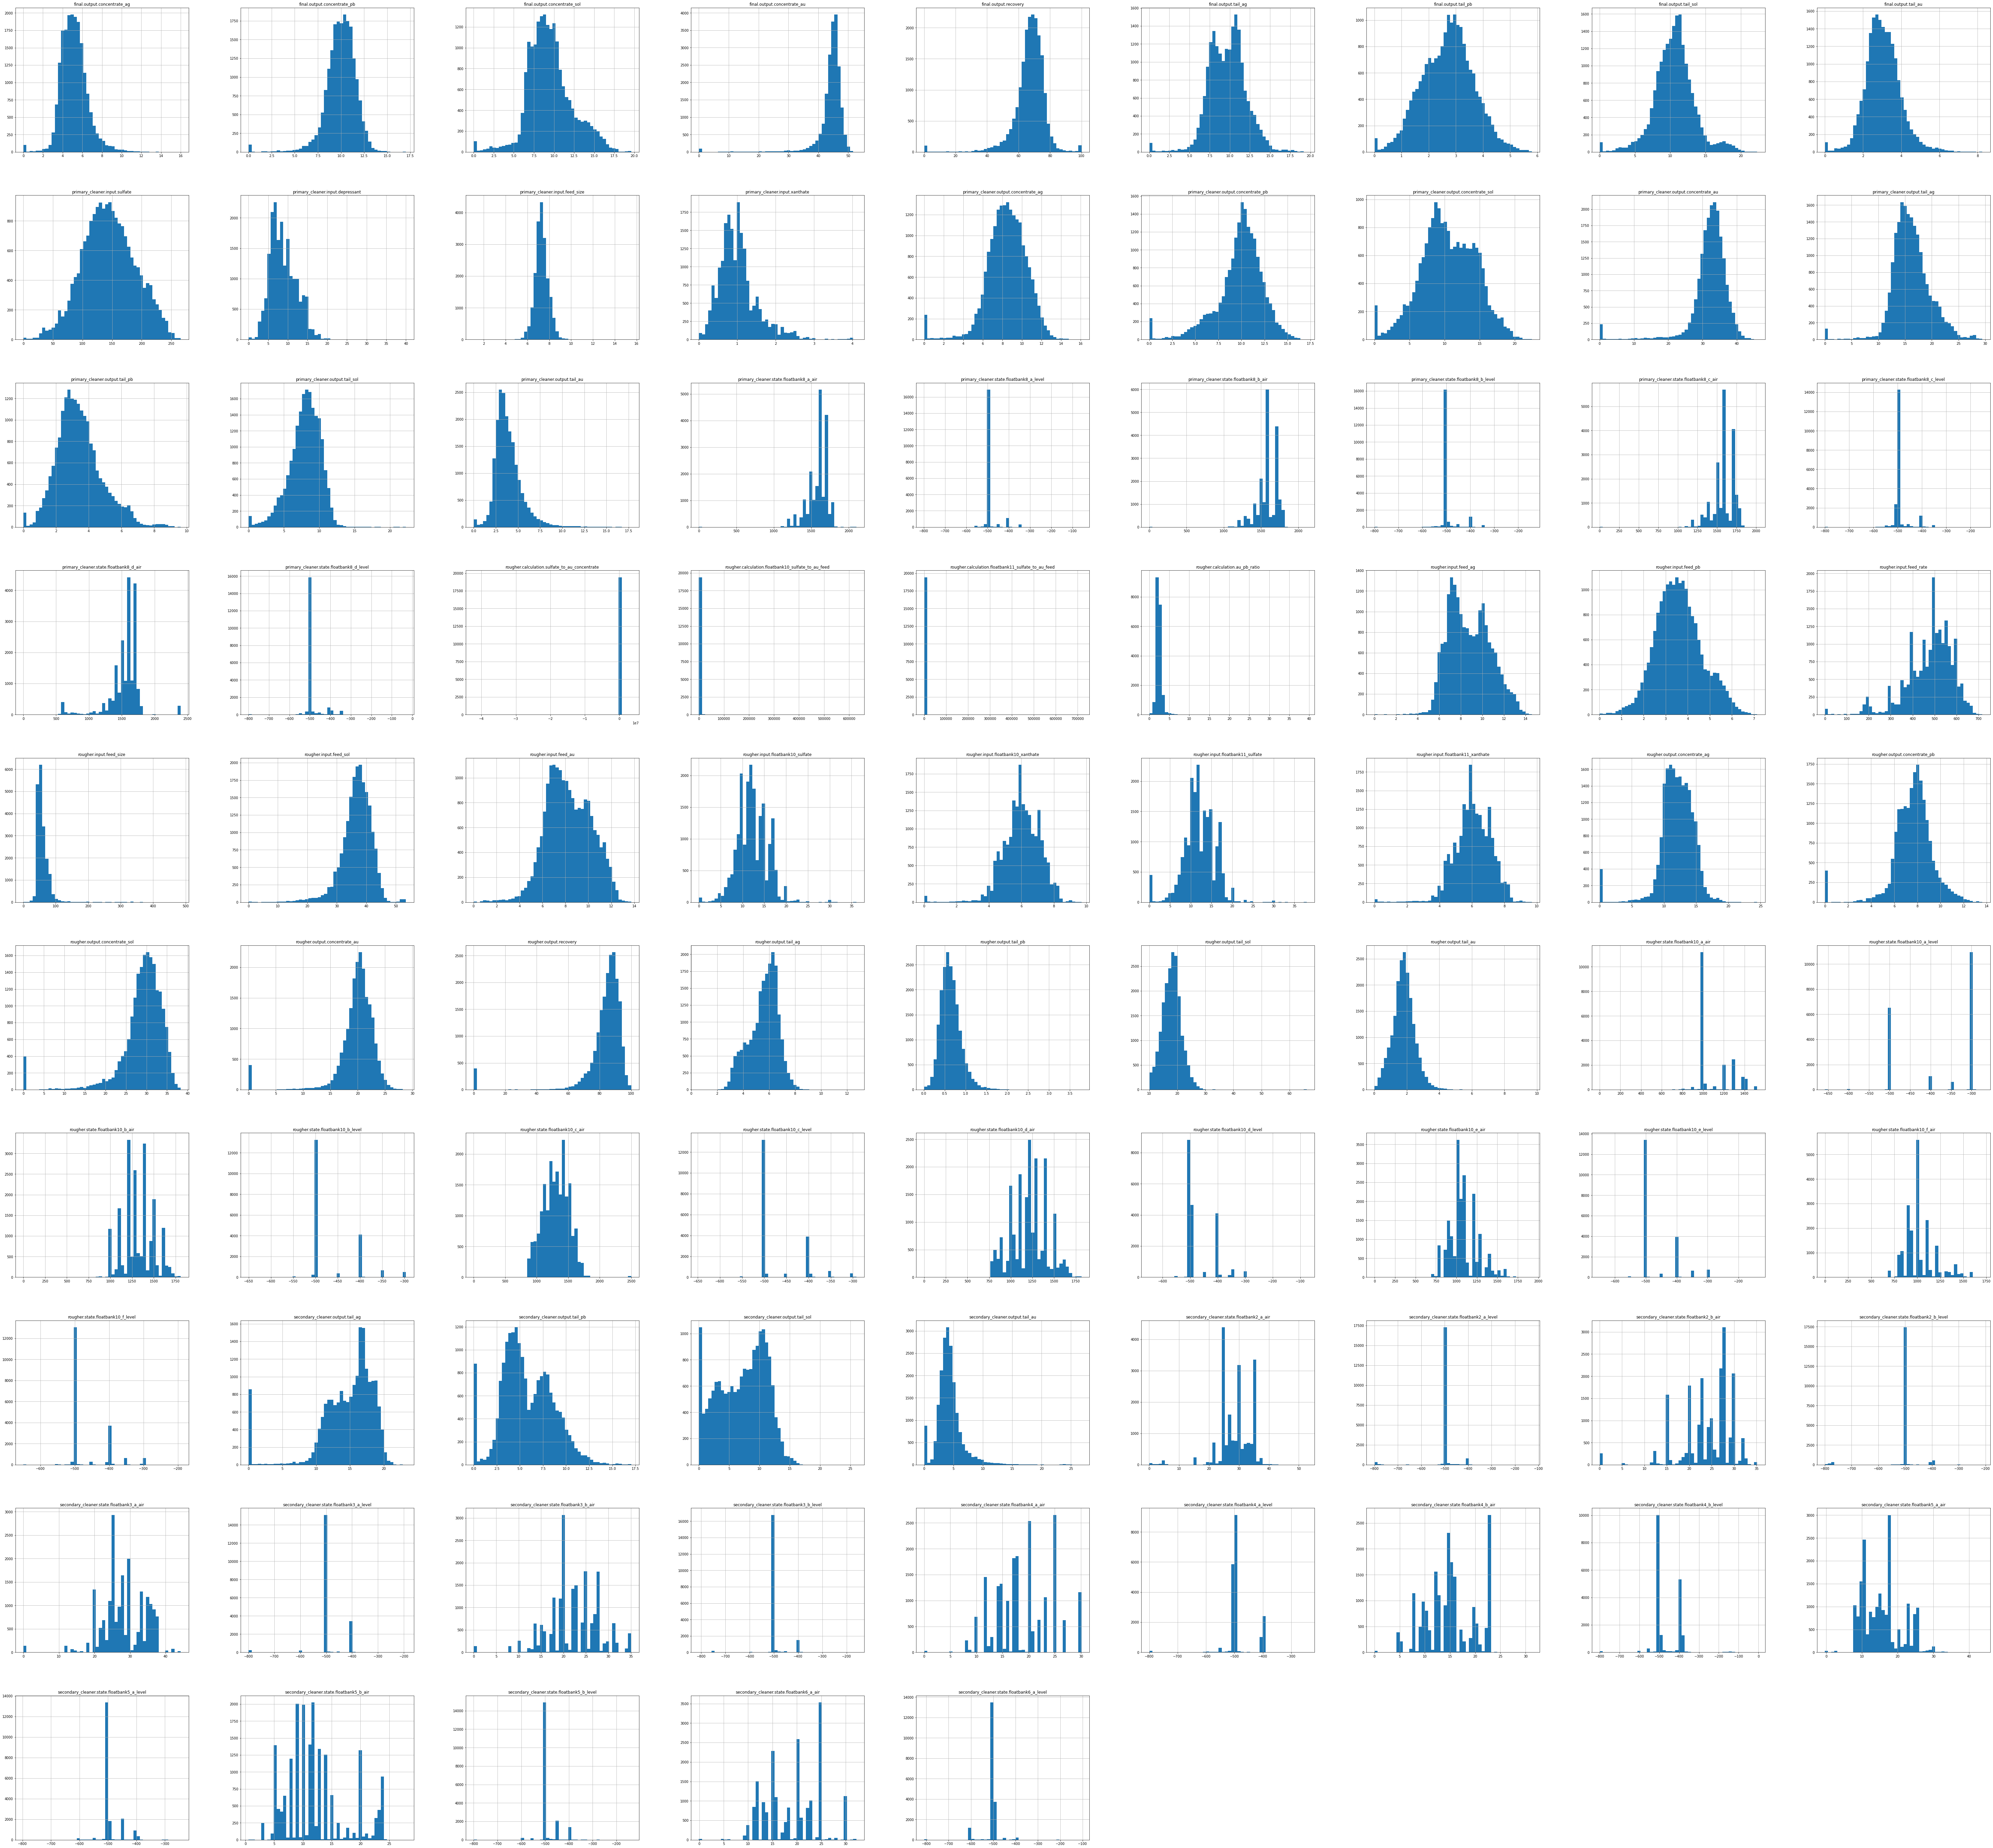

In [4]:
df_review(df_full)


#### Обучающая выборка

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

None

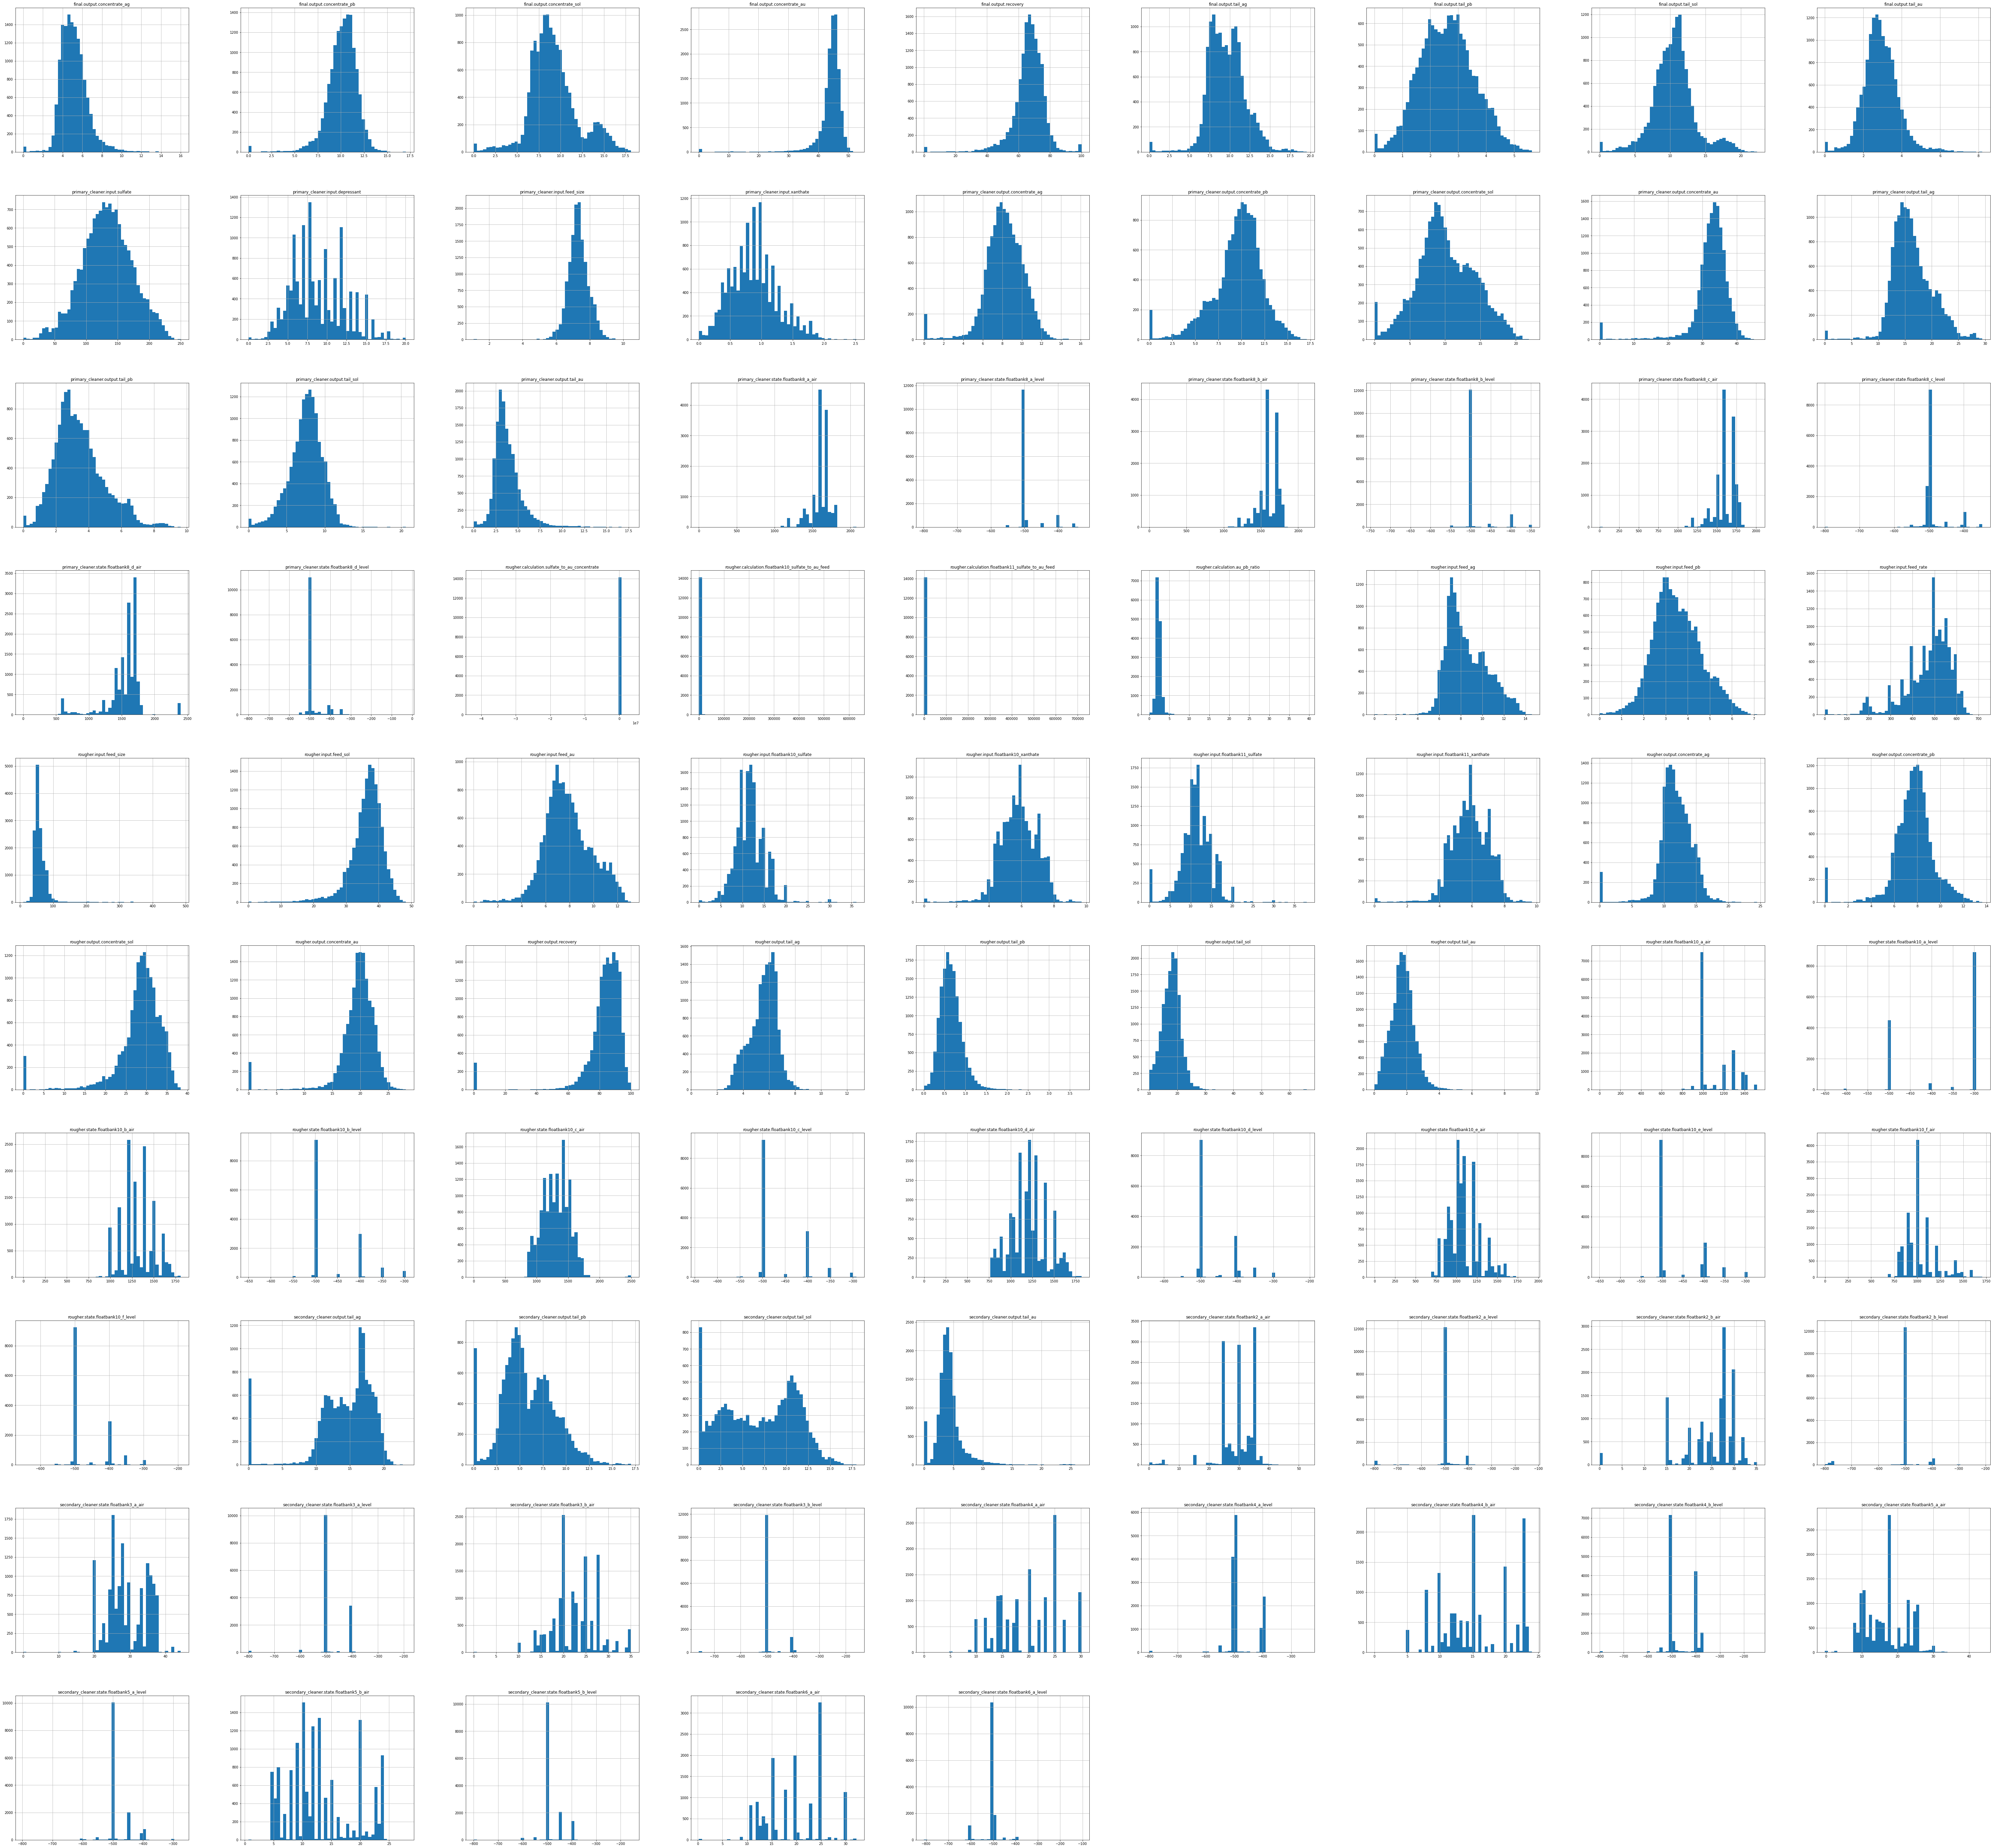

In [5]:
df_review(df_train)

#### Тестовая выборка

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

None

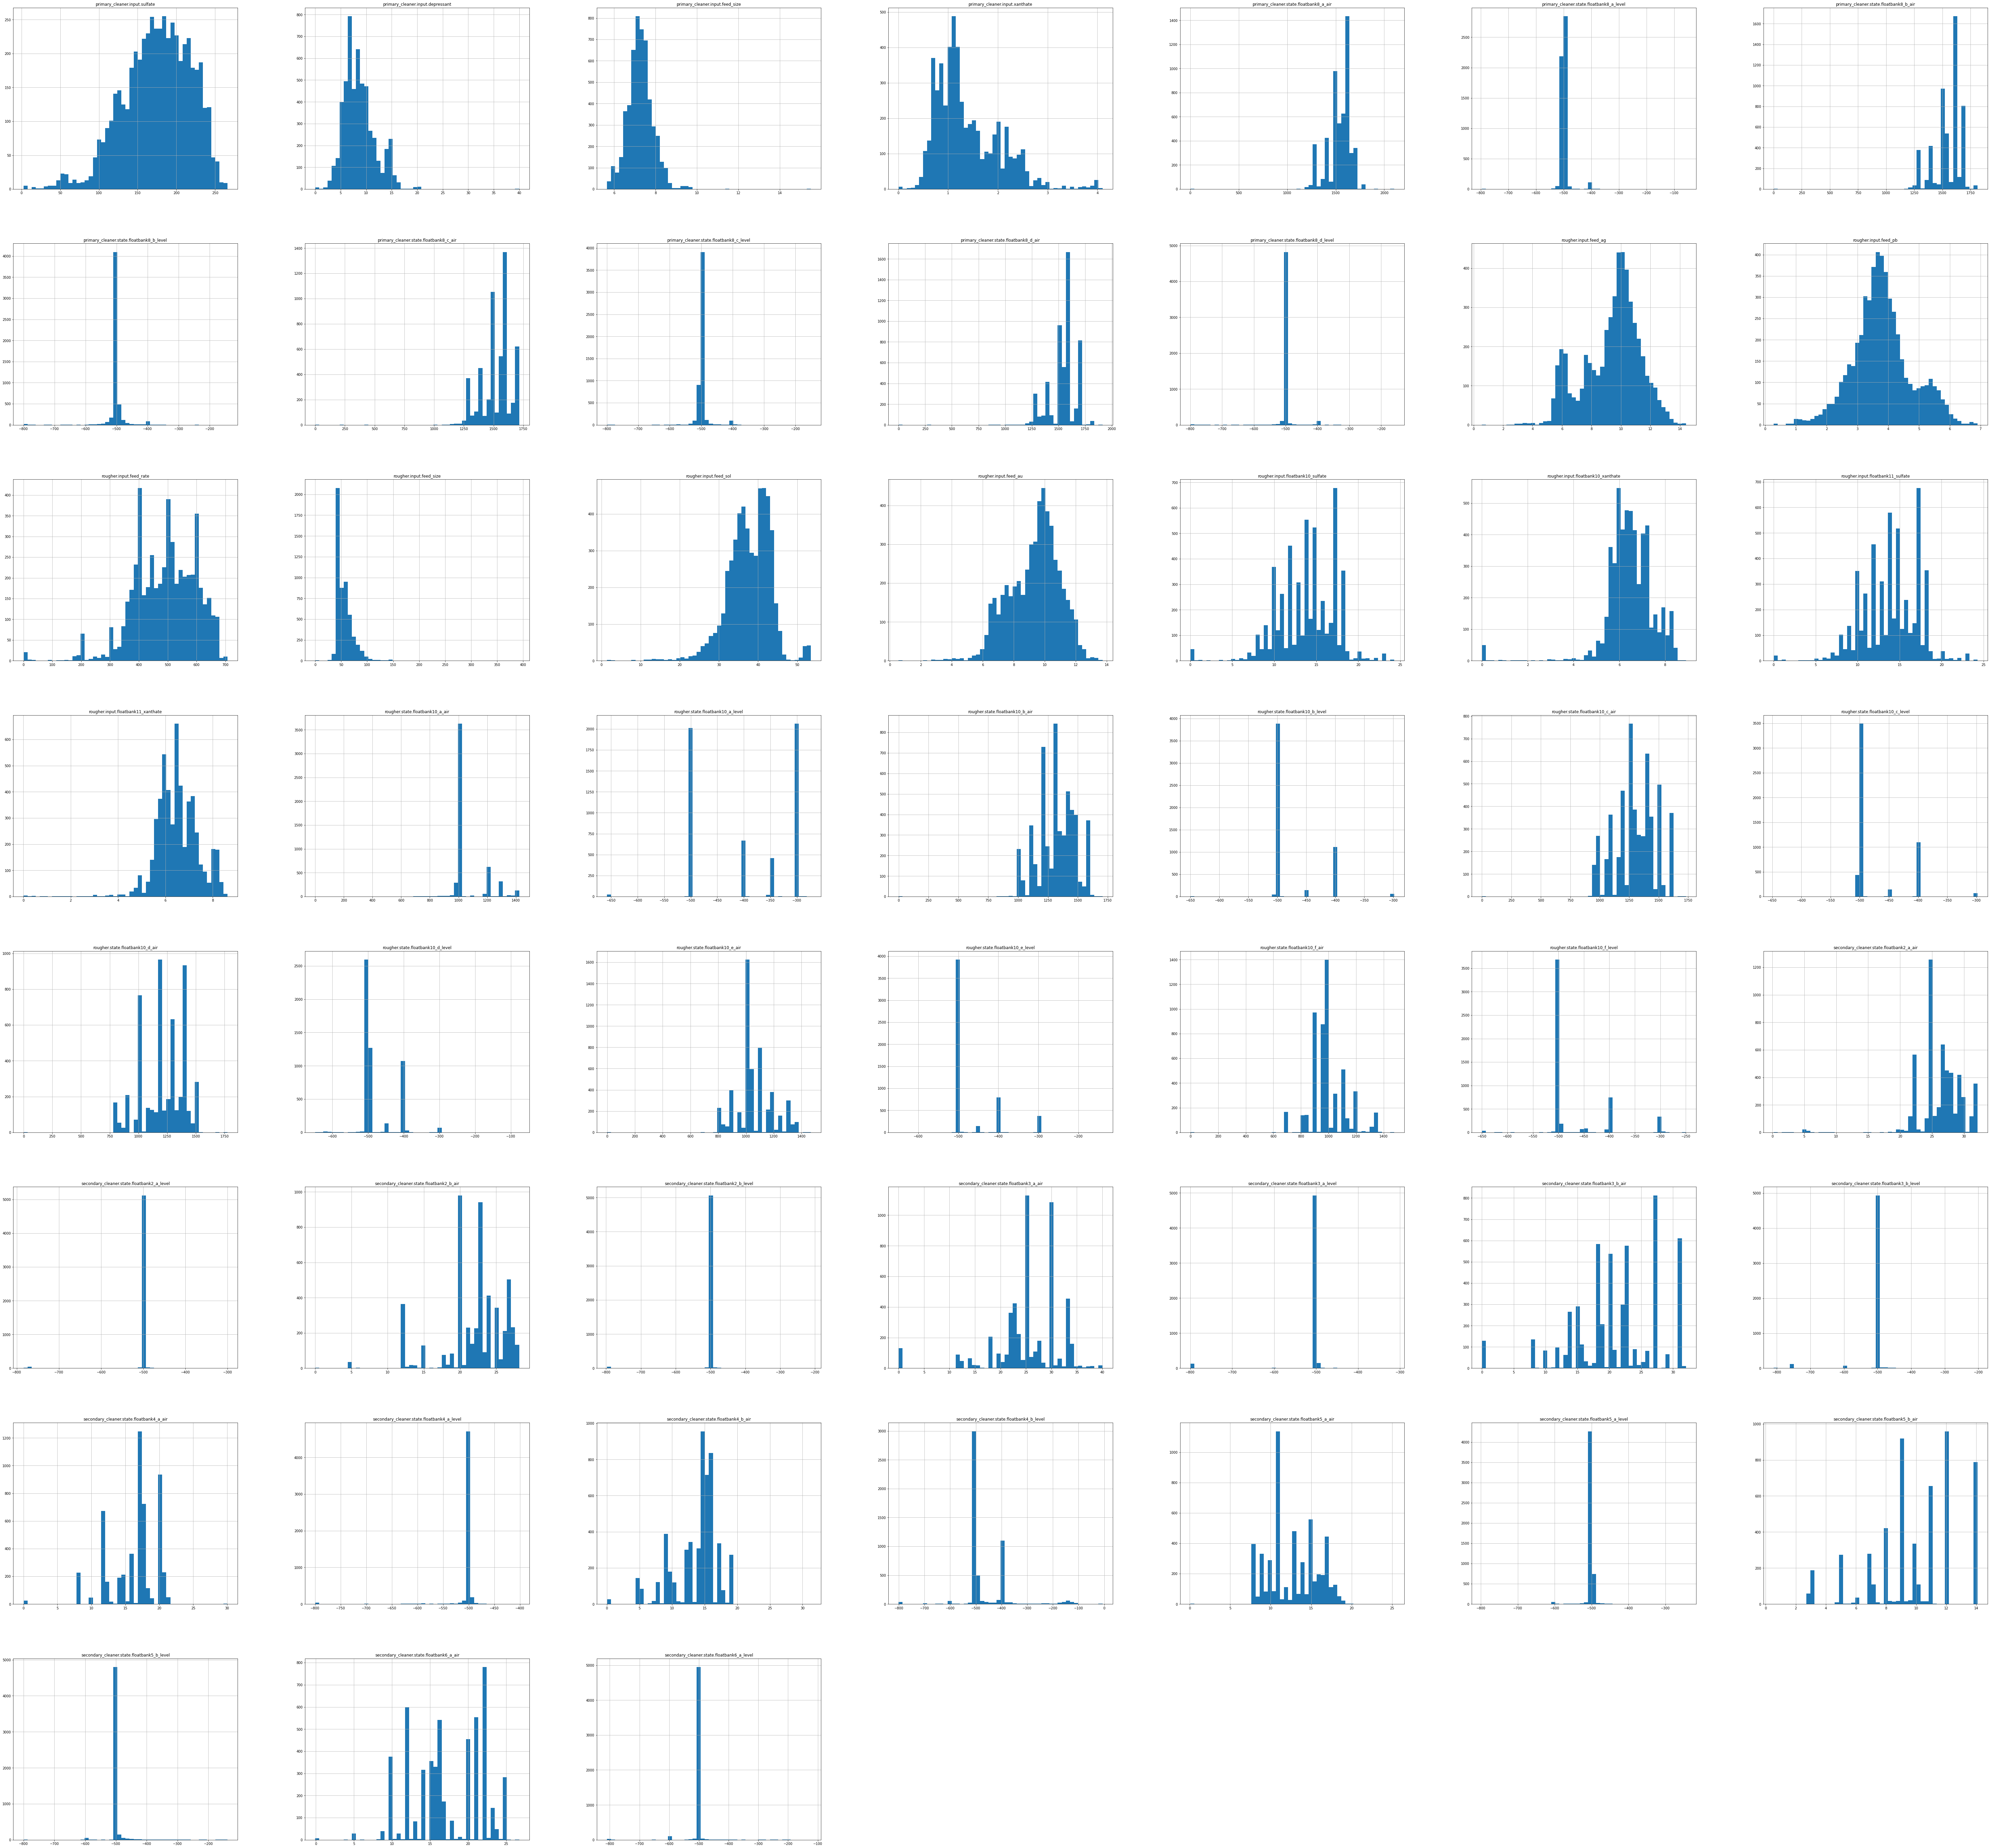

In [6]:
df_review(df_test)

__Вывод:__ Для иследования предоставлены данные

### Проверка расчетов эффективности обогащения

Проверим на обучающей выборке расчеты эффективности обогащения.

Для расчетов будем использовать формулу __(C * (F-T)) / (F * (C-T)) * 100__, где
* C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au)
* F — доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au)
* T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au)



In [7]:
def calc_recovery(C, F, T):
    recovery = (C * (F-T)) / (F * (C-T)) * 100
    return recovery

In [8]:
rec_train = calc_recovery(
    df_train['rougher.output.concentrate_au'], 
    df_train['rougher.input.feed_au'], 
    df_train['rougher.output.tail_au'])


Сравним средние значения наших расчетов с теми, которые представлены в обучающей выборке:

In [9]:
rec_train.mean()

82.70450164550293

In [10]:
df_train['rougher.output.recovery'].mean()

82.70450164550293

Подсчитаем __MAE__ (среднюю абсолютную ошибку) между нашими рассчетами и данными обучающей выборки:

In [11]:
mean_absolute_error(df_train['rougher.output.recovery'], rec_train)

9.73512347450521e-15

__Вывод:__ __MAE__ (средняя абсолютная ошибка) между рассчитаной по формуле эффективностью обогащения и данными из датасета предельно мала, следовательно данные по эффективности, представленные в датасете могут считаться верными.

### Признаки в выборках

Количество столбцов в тестовой выборке разительно отличается от количества столбцов в выборке обучающей и в исходных данных.

Уточним, какие данные присутствуют в обучающей выборке, но отсутствуют в тестовой:

In [12]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

__Вывод:__ В тестовой выборке отсутствуют признаки типа __output__ и __calculation__. Фактически, в тестовой выборке отсутствуют результирующие данные по этапам обработки и рассчетные данные, т.е. то, что замеряется или рассчитывается позже.

### Предобрабокта данных

#### Целевые признаки

В качестве целевых показателей для последующего построения модели используем показатели параметров продукта на этапе флотации (__rougher.output.recovery__) и параметров продукта на финальном этапе (__final.output.recovery__).

В связи с отсутствием этих показателей в тестовой выборке, дополним ее из исходных данных:

In [13]:
display(df_test.shape)
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery']].loc[df_test.index], on='date', how='left')

display(df_test.shape)

(5290, 52)

(5290, 54)

#### Пропуски и дубликаты

In [14]:
def mis_dub(df):
    print('Пропуски данных:')
    display(df.isna().sum())
    print('Дубликаты:')
    display(df.duplicated().sum())

##### Исходные данные

In [15]:
mis_dub(df_full)

Пропуски данных:


final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.concentrate_au                   

Дубликаты:


0

In [16]:
pd.DataFrame(round(df_full.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.000000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,1.000000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000
primary_cleaner.input.sulfate,0.000000


##### Обучающая выборка

In [17]:
mis_dub(df_train)

Пропуски данных:


final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.concentrate_au                   

Дубликаты:


0

In [18]:
pd.DataFrame(round(df_train.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.000000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,1.000000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000
primary_cleaner.input.sulfate,0.000000


##### Тестовая выборка

In [19]:
mis_dub(df_test)

Пропуски данных:


primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Дубликаты:


0

In [20]:
pd.DataFrame(round(df_test.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
primary_cleaner.input.sulfate,0.000000
primary_cleaner.input.depressant,0.000000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.000000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000
primary_cleaner.state.floatbank8_c_level,0.000000


Дубликатов в данных не обнаружено. Пропуски есть, их незначительное количество в тестовой выборке, а в обучающей и в исходных данных единственный столбец с заметным количеством пропусков: __secondary_cleaner.output.tail_sol__.

По вводной информации данные индексируются датой и временем получения информации (признак date), в связи с чем соседние по времени параметры часто похожи.

Поэтому можно заполнить пропуски предыдущими соседними данными методом __ffill__.

In [21]:
df_full.ffill(axis='rows', inplace=True)
df_train.ffill(axis='rows', inplace=True)
df_test.ffill(axis='rows', inplace=True)

Проверим, что в выборках и исходных данных не осталось пропусков:

In [22]:
df_full.isna().sum().sum()

0

In [23]:
df_train.isna().sum().sum()

0

In [24]:
df_test.isna().sum().sum()

0

__Вывод:__ В ходе предобработки данных была осуществлена корректировка данных по целевым признакам, а также проверка на пропуски и дубликаты.

## Анализ данных

Посмотрим как изменяется концентрация металлов на разных этапах очистки, как распределяются размеры гранул сырья в обучающей и тестовой выборках и какой получаются суммарная концентрация всех веществ на разных стадиях.

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

In [25]:
def concentrate_metal_hist(df, metal, x, y):
    plt.figure(figsize=[12,9])

    plt.hist(df['rougher.input.feed_{}'.format(metal)], bins=200, label = 'rougher.input.feed', alpha=.5)
    plt.hist(df['rougher.output.concentrate_{}'.format(metal)], bins=200, label = 'rougher.output', alpha=.5)
    plt.hist(df['primary_cleaner.output.concentrate_{}'.format(metal)], bins=200, label = 'primary_cleaner.output', alpha=.5)
    plt.hist(df['final.output.concentrate_{}'.format(metal)], bins=200, label = 'final.output', alpha=.5)

    plt.xlim([0, x])
    plt.ylim([0, y])

    plt.xlabel('Concentrate of {} on output'.format(metal.upper()))
    plt.ylabel('Frequency')

    plt.legend(loc='upper left', fontsize='x-large')

    plt.title('Hist of concentration of {}'.format(metal.upper()))
    plt.show()
    

__Концентрация золота на различных этапах очистки__

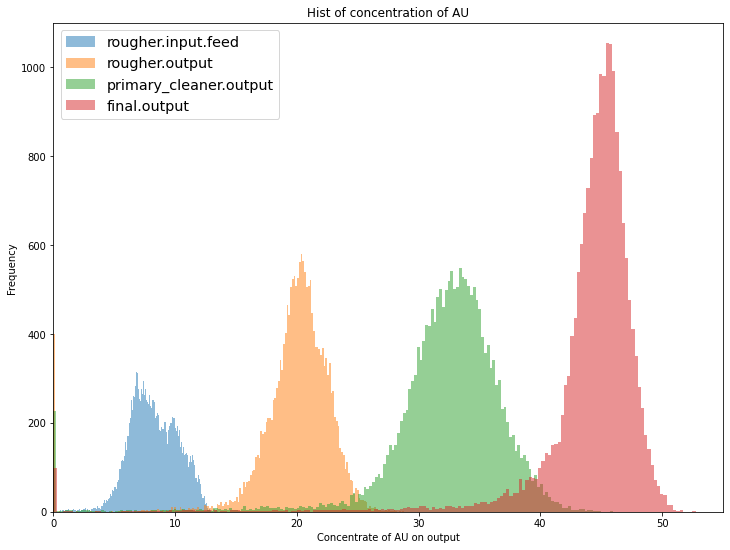

In [26]:
concentrate_metal_hist(df_full, 'au', 55, 1100)

__Концентрация серебра на различных этапах очистки__

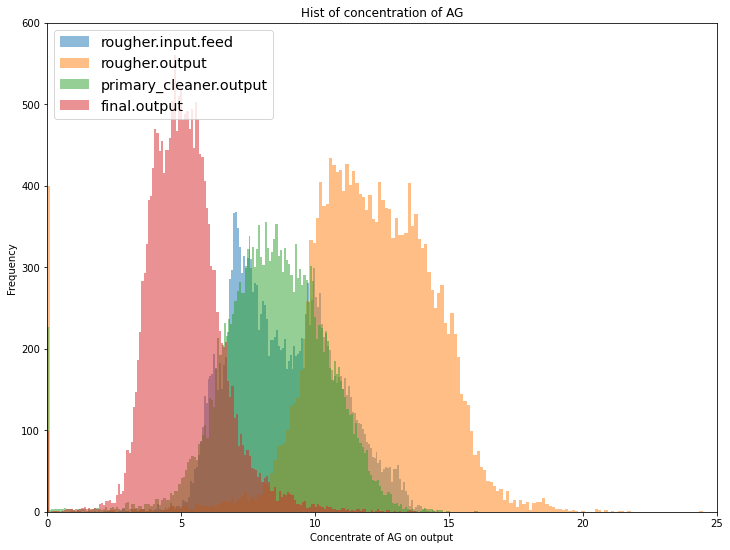

In [27]:
concentrate_metal_hist(df_full, 'ag', 25, 600)

__Концентрация свинца на различных этапах очистки__

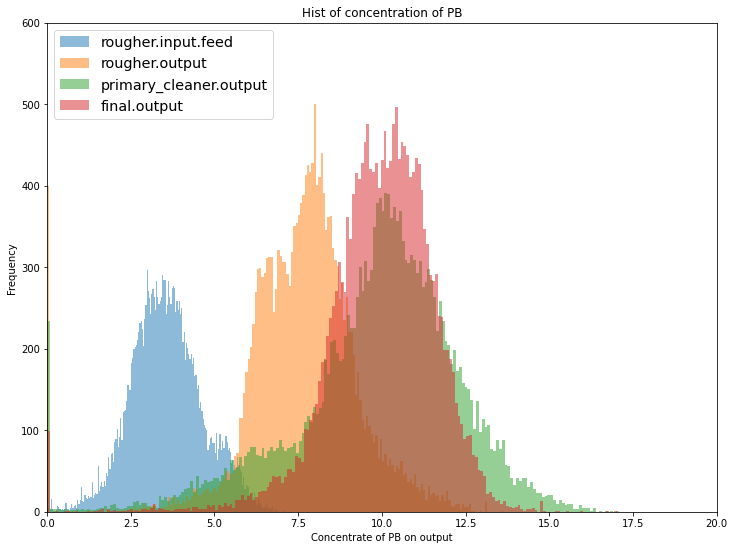

In [28]:
concentrate_metal_hist(df_full, 'pb', 20, 600)

__Вывод:__ Концентрация золота повышается от флотации до финальной очистки.Концентрация серебра уменьшается в процессе очистки. Самая большая концентрация на первой стадии и самая маленькая на конечной. Концентрация свинца повышается с этапа флотации до первичной очистки. И потом усредняется.


### Распределение размеров гранул сырья на обучающей и тестовой выборках

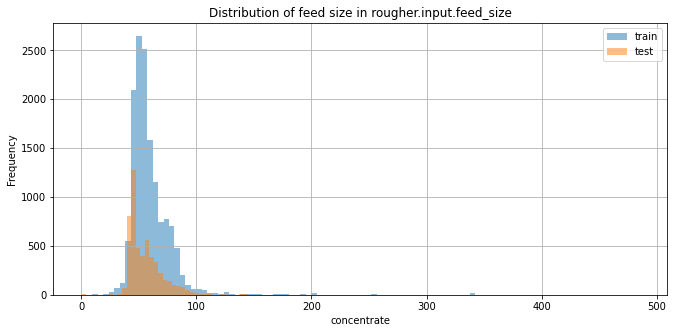

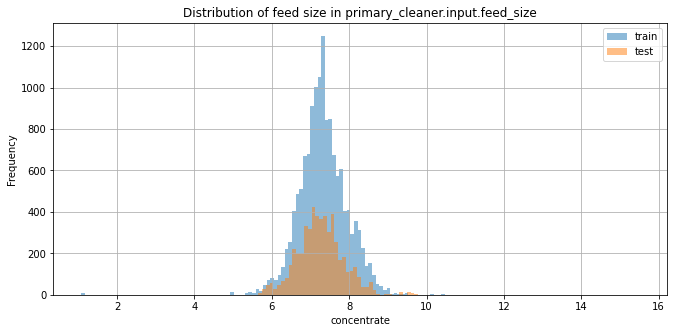

In [29]:
for metric in ('rougher.input.feed_size', 'primary_cleaner.input.feed_size'):
    for label, df in (('train', df_train), ('test', df_test)): 
        df[metric].plot(
                title = 'Distribution of feed size in {}'.format(metric),
                kind='hist', 
                bins=100, 
                grid=True, 
                legend=True,
                figsize=(11, 5),
                alpha=0.5,
                label=label,
            ).set(xlabel='concentrate')
  
    plt.show()

Похоже, что распределения примерно одинаковы. Проверим это на графиках плотности: 

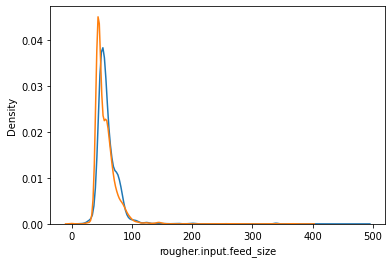

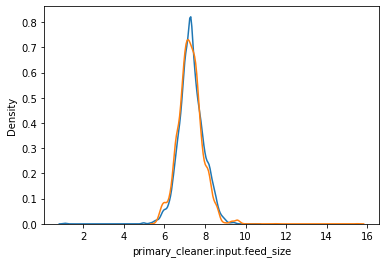

In [30]:
for metric in ('rougher.input.feed_size', 'primary_cleaner.input.feed_size'):
    for df in (df_train, df_test): 
        sns.kdeplot(data=df, x=metric)
    plt.show()

Посмотрим различие средних размеров гранул на этапе флотации и на этапе первичной очистки:

In [31]:
print('Rougher train:', df_train['rougher.input.feed_size'].mean())
print('Rougher test:', df_test['rougher.input.feed_size'].mean())
print('Difference of mean size on rougher stage:', df_train['rougher.input.feed_size'].mean() - df_test['rougher.input.feed_size'].mean())


Rougher train: 60.23985599255732
Rougher test: 55.952754028895136
Difference of mean size on rougher stage: 4.287101963662181


In [32]:
print('Primary cleaner train:', df_train['primary_cleaner.input.feed_size'].mean())
print('Primary cleaner  test:', df_test['primary_cleaner.input.feed_size'].mean())
print('Difference of mean size on primary cleaner stage:', df_train['primary_cleaner.input.feed_size'].mean() - df_test['primary_cleaner.input.feed_size'].mean())

Primary cleaner train: 7.322309906901314
Primary cleaner  test: 7.266339191270906
Difference of mean size on primary cleaner stage: 0.055970715630407675


__Вывод:__ Распределение гранул до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Размеры гранул перед первичной очисткой обладают нормальным распределением. Средние размеры гранул различаются не сильно.

При этом распределения размеров гранул сырья на обучающей и тестовой выборках совпадают, что важно для правильности оценки модели. 

### Суммарная концентрация всех веществ на разных стадиях

In [33]:
concentrate_sum = pd.DataFrame()

ri = 'rougher.input.feed_'
ro = 'rougher.output.concentrate_'
pc = 'primary_cleaner.output.concentrate_'
fo = 'final.output.concentrate_'

concentrate_sum['rougher.input.feed'] = df_full[[ri+'au', ri+'ag', ri+'pb', ri+'sol']].sum(axis=1)
concentrate_sum['rougher.output'] = df_full[[ro+'au', ro+'ag', ro+'pb', ro+'sol']].sum(axis=1)
concentrate_sum['primary_cleaner.output'] = df_full[[pc+'au', pc+'ag', pc+'pb', pc+'sol']].sum(axis=1)
concentrate_sum['final.output'] = df_full[[fo+'au', fo+'ag', fo+'pb', fo+'sol']].sum(axis=1)

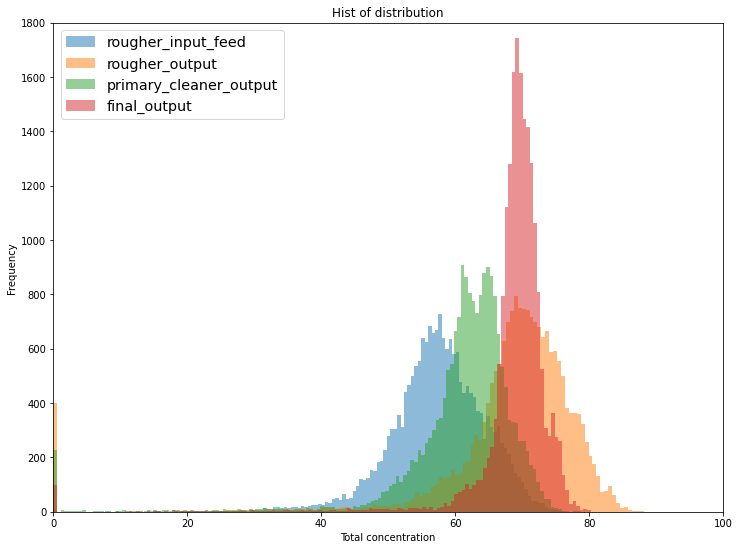

In [34]:
plt.figure(figsize=[12,9])

plt.hist(concentrate_sum['rougher.input.feed'], bins=150, label = 'rougher_input_feed', alpha=.5)
plt.hist(concentrate_sum['rougher.output'], bins=150, label = 'rougher_output', alpha=.5)
plt.hist(concentrate_sum['primary_cleaner.output'], bins=150, label = 'primary_cleaner_output', alpha=.5)
plt.hist(concentrate_sum['final.output'], bins=150, label = 'final_output', alpha=.5)


plt.xlim([0, 100])
plt.ylim([0, 1800])

plt.xlabel("Total concentration")
plt.ylabel("Frequency")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Hist of distribution")
plt.show()

Обнаружились аномалии - в районе нулевых значений. Посмотрим на нулевые значения в данных:

In [35]:
display(df_full[df_full == 0].count())
display(df_train[df_train == 0].count())
display(df_test[df_test == 0].count())

final.output.concentrate_ag                            98
final.output.concentrate_pb                            98
final.output.concentrate_sol                           98
final.output.concentrate_au                            98
final.output.recovery                                  98
final.output.tail_ag                                   91
final.output.tail_pb                                   91
final.output.tail_sol                                  91
final.output.tail_au                                   91
primary_cleaner.input.sulfate                           0
primary_cleaner.input.depressant                       18
primary_cleaner.input.feed_size                         0
primary_cleaner.input.xanthate                          0
primary_cleaner.output.concentrate_ag                 108
primary_cleaner.output.concentrate_pb                 114
primary_cleaner.output.concentrate_sol                116
primary_cleaner.output.concentrate_au                 108
primary_cleane

final.output.concentrate_ag                            58
final.output.concentrate_pb                            58
final.output.concentrate_sol                           58
final.output.concentrate_au                            58
final.output.recovery                                  58
final.output.tail_ag                                   75
final.output.tail_pb                                   75
final.output.tail_sol                                  75
final.output.tail_au                                   75
primary_cleaner.input.sulfate                           0
primary_cleaner.input.depressant                       18
primary_cleaner.input.feed_size                         0
primary_cleaner.input.xanthate                          0
primary_cleaner.output.concentrate_ag                  74
primary_cleaner.output.concentrate_pb                  79
primary_cleaner.output.concentrate_sol                 80
primary_cleaner.output.concentrate_au                  74
primary_cleane

primary_cleaner.input.sulfate                  0
primary_cleaner.input.depressant               0
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 0
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        0
rougher.input.feed_size                        0
rougher.input.feed_sol                         0
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              0
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Эти аномалии могли появиться по разным причинам, например в результате сбоя оборудования. Удалим аномалии.

In [36]:
def remove_zeros(df, l):

    print(df.shape)

    for i in l:    
        df = df[df[i] > 0]
    
    print(df.shape)
    
    return df

In [37]:
df_full = remove_zeros(df_full, ['final.output.recovery', 'rougher.output.recovery', 'primary_cleaner.output.concentrate_au'])

(19439, 86)
(18848, 86)


In [38]:
df_train = remove_zeros(df_train, ['final.output.recovery', 'rougher.output.recovery', 'primary_cleaner.output.concentrate_au'])

(14149, 86)
(13725, 86)


In [39]:
df_test = remove_zeros(df_test, ['final.output.recovery', 'rougher.output.recovery'])

(5290, 54)
(5154, 54)


__Вывод:__ Аномалии в основном присутствуют на этапе флотации, особенном много значений в районе нуля. На этапе сырья их почти нет, в финальном концентрате есть, но не так много как на черновом. Эти аномалии могут влиять на конечные рассчетные характеристики, поэтому они удалены из данных. 

## Модель

### Подготовка к моделированию

Удалим те признаки обучающей выборки, которых нет в тестовой.

In [40]:
df_train = df_train.drop(set(df_train.columns)-set(df_test.columns), axis=1)

Подготовим функцию для вычисления итоговой метрики симметричного среднего абсолютного процентного отклонения sMAPE:

In [41]:
def smape_unweighted(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = (error / scale).mean() * 100
    return result


def smape_weighted(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape_unweighted(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape_unweighted(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final


In [42]:
smape_scorer = make_scorer(smape_weighted, greater_is_better=False)

Отделим целевые признаки от остальных для 

In [43]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

In [44]:
display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)

(13725, 52)

(13725, 2)

(5154, 52)

(5154, 2)

### Обучение моделей

Обучим модели и найдем, какая из них дает лучший __sMAPE__.

__Модель решающего дерева__

In [45]:
param_grid = {'max_depth': range (2,5),
              'min_samples_leaf': range (1,5)}

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Best final sMAPE for decision tree: {} with hyperparametrs: {}'.format(-search.best_score_, search.best_params_))

Best final sMAPE for decision tree: 9.174433066066552 with hyperparametrs: {'max_depth': 2, 'min_samples_leaf': 1}


__Модель случайного леса__

In [46]:
param_grid = { 'n_estimators': range (20, 121, 20),
              'max_depth': range (1,5)}

model = RandomForestRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Best final sMAPE for random forest: {} with hyperparametrs: {}'.format(-search.best_score_, search.best_params_))

Best final sMAPE for random forest: 8.689096598791178 with hyperparametrs: {'max_depth': 3, 'n_estimators': 100}


__Модель линейной регрессии__

In [47]:
model = LinearRegression()
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer).mean()
print('Best final sMAPE for linear regression:', -smape)

Best final sMAPE for linear regression: 10.029323387481938


Лучшие результаты на обучающей вырборке показала модель случайного леса с гиперпараметрами в 100 деревьев с глубиной 3.

### Проверка на тестовой выборке

Проверим модель случайного леса на тестовой выборке

In [48]:
model = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=RANDOM_STATE) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('Final sMAPE with test data:', smape_weighted(target_test, predictions_test))

Final sMAPE with test data: 7.1671420111859945


### Проверка на адекватность

Проведем проверку на адекватность модели:

In [49]:
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(features_train, target_train)
test_predictions = dummy_model.predict(features_test)

print('Final sMAPE for DummyRegressor:', smape_weighted(target_test, test_predictions))

Final sMAPE for DummyRegressor: 7.77535335188992


Результат final sMAPE на тестовой выборке модели случайного леса (7.1671420111859945) лучше среднего (7.77535335188992).

Модель прошла проверку на адекватность.

## Обшие итоги

В рамках подготовки прототипа модели машинного обучения по предсказанию коэффициента восстановления золота из золотосодержащей руды были получен датасет с данными различных этапов обработки руды, при этом в датасете уже было произведено разделение на тестовую и обучающую выборки.

Была проведена работа по подготовке данных к моделированию: уточнены целевые признаки и их наличие в выборках, данные проверены на пропуски и дубликаты.

Был проведен анализ, который позволил уточнить наличие в данных нулевых значений, которые могли помешать работе модели.

В качестве вариантов моделей были выбраны модели решающего дерева, случайного леса и линейной регрессии.

Лучшие результаты показала модель случайного леса с количеством деревьев 100 и глубиной 3.

Итоговый результат метрики __sMAPE__ на тестовых данных составил 7.1671420111859945.